In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils

import matplotlib.pyplot as plt

2022-10-07 10:05:57.278422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-10-07 10:05:57.278476: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [31]:
pd.__version__

'1.4.2'

In [2]:
folder = "/home1/smaruj/akita_utils/bin/insert_virtual_flanks_experiment/data/"

left_filename = "big_left.h5"               #orientation "<<"
right_filename = "big_right.h5"             #orientation ">>"
convergent_filename = "big_convergent.h5"   #orientation "><"
divergent_filename = "big_divergent.h5"     #orientation "<>"

scd_stats = ["SCD", "INS-16", "INS-64", "INS-256"]

In [3]:
left_df = akita_utils.h5_to_df(folder + left_filename, scd_stats, drop_duplicates_key=None)
right_df = akita_utils.h5_to_df(folder + right_filename, scd_stats, drop_duplicates_key=None)
convergent_df = akita_utils.h5_to_df(folder + convergent_filename, scd_stats, drop_duplicates_key=None)
divergent_df = akita_utils.h5_to_df(folder + divergent_filename, scd_stats, drop_duplicates_key=None)

In [4]:
frames = [left_df, right_df, convergent_df, divergent_df]

df = pd.concat(frames)

In [5]:
is_strong = lambda x : True if (x > 20) else False

df["strong"] = df["genomic_SCD"].apply(is_strong)

In [6]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe
    

In [7]:
for stat in ["SCD", "INS-16", "INS-64", "INS-256"]:
    df = average_over_targets(df, stat)

In [44]:
df.groupby(["orientation", "background_index"]).agg({"SCD_average": "mean"}).reset_index()

,orientation,background_index,SCD_average
0,<<,0,49.87500
1,<<,1,47.00000
2,<<,2,45.18750
3,<>,0,47.40625
4,<>,1,47.00000
5,<>,2,44.46875
6,><,0,47.71875
7,><,1,46.62500
8,><,2,43.68750
9,>>,0,45.71875


In [19]:
df.groupby(["background_index", "orientation"]).agg({"SCD_average": ["mean", "min", "max"]}).columns

MultiIndex([('SCD_average', 'mean'),
            ('SCD_average',  'min'),
            ('SCD_average',  'max')],
           )

In [26]:
df.groupby(["background_index", "orientation"]).agg({"SCD_average": ["mean", "min", "max"]}).reset_index()

background_index orientation SCD_average                    
                                       mean       min       max
0                 0          <<    49.87500  37.75000  109.1875
1                 0          <>    47.40625  37.40625   94.8125
2                 0          ><    47.71875  37.40625   98.0625
3                 0          >>    45.71875  37.37500   83.1250
4                 1          <<    47.00000  38.75000   92.5000
5                 1          <>    47.00000  38.75000   95.5625
6                 1          ><    46.62500  38.78125   89.1875
7                 1          >>    48.31250  38.81250  101.6875
8                 2          <<    45.18750  38.84375   82.0625
9                 2          <>    44.46875  38.75000   80.0000
10                2          ><    43.68750  38.84375   75.4375
11                2          >>    43.81250  38.65625   74.7500

In [37]:
df.groupby(["background_index", "orientation"]).agg({"SCD_average": ["mean", "min", "max"]}).reset_index()

background_index orientation SCD_average                    
                                       mean       min       max
0                 0          <<    49.87500  37.75000  109.1875
1                 0          <>    47.40625  37.40625   94.8125
2                 0          ><    47.71875  37.40625   98.0625
3                 0          >>    45.71875  37.37500   83.1250
4                 1          <<    47.00000  38.75000   92.5000
5                 1          <>    47.00000  38.75000   95.5625
6                 1          ><    46.62500  38.78125   89.1875
7                 1          >>    48.31250  38.81250  101.6875
8                 2          <<    45.18750  38.84375   82.0625
9                 2          <>    44.46875  38.75000   80.0000
10                2          ><    43.68750  38.84375   75.4375
11                2          >>    43.81250  38.65625   74.7500

In [41]:
df.groupby(["background_index", "orientation"]).agg({"SCD_average": ["mean", "min", "max"]}).reset_index().drop_levels(0)


AttributeError: 'DataFrame' object has no attribute 'drop_levels'

In [36]:
df.groupby(["background_index", "orientation"]).agg({"SCD_average": ["mean", "min", "max"]}).unstack().transpose()

background_index                      0          1         2
                 orientation                                
SCD_average mean <<            49.87500   47.00000  45.18750
                 <>            47.40625   47.00000  44.46875
                 ><            47.71875   46.62500  43.68750
                 >>            45.71875   48.31250  43.81250
            min  <<            37.75000   38.75000  38.84375
                 <>            37.40625   38.75000  38.75000
                 ><            37.40625   38.78125  38.84375
                 >>            37.37500   38.81250  38.65625
            max  <<           109.18750   92.50000  82.06250
                 <>            94.81250   95.56250  80.00000
                 ><            98.06250   89.18750  75.43750
                 >>            83.12500  101.68750  74.75000

In [9]:
strong_4colors = ["#4dac26", "#d01c8b", "#fc7a02", "#a819dd"]
weak_4colors = ["#2166ac", "#e43201", "#614616", "#028a75"]

In [10]:
df.columns

Index(['INS-16_h1_m1_t0', 'INS-16_h1_m1_t1', 'INS-16_h1_m1_t2',
       'INS-16_h1_m1_t3', 'INS-16_h1_m1_t4', 'INS-16_h1_m1_t5',
       'INS-256_h1_m1_t0', 'INS-256_h1_m1_t1', 'INS-256_h1_m1_t2',
       'INS-256_h1_m1_t3', 'INS-256_h1_m1_t4', 'INS-256_h1_m1_t5',
       'INS-64_h1_m1_t0', 'INS-64_h1_m1_t1', 'INS-64_h1_m1_t2',
       'INS-64_h1_m1_t3', 'INS-64_h1_m1_t4', 'INS-64_h1_m1_t5', 'SCD_h1_m1_t0',
       'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3', 'SCD_h1_m1_t4',
       'SCD_h1_m1_t5', 'background_index', 'chrom', 'end', 'experiment_id',
       'flank_bp', 'genomic_SCD', 'orientation', 'spacer_bp', 'start',
       'strand', 'strong', 'SCD_average', 'INS-16_average', 'INS-64_average',
       'INS-256_average'],
      dtype='object')

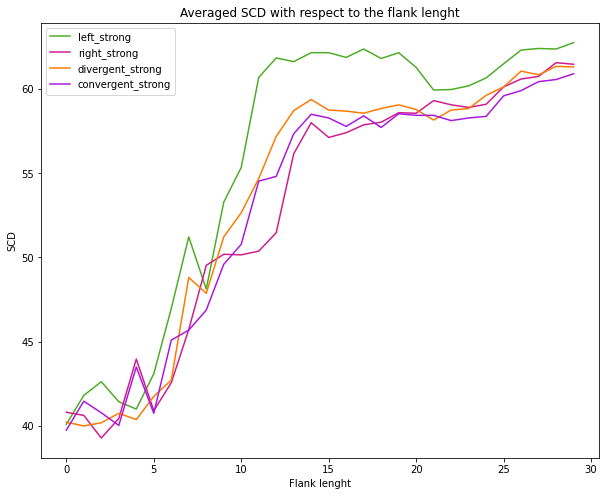

In [17]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]

plt.plot(x, df[(df["orientation"] == "<<") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="left_strong", c=strong_4colors[0])
plt.plot(x, df[(df["orientation"] == ">>") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="right_strong", c=strong_4colors[1])
plt.plot(x, df[(df["orientation"] == "<>") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="divergent_strong", c=strong_4colors[2])
plt.plot(x, df[(df["orientation"] == "><") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="convergent_strong", c=strong_4colors[3])

plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper left")

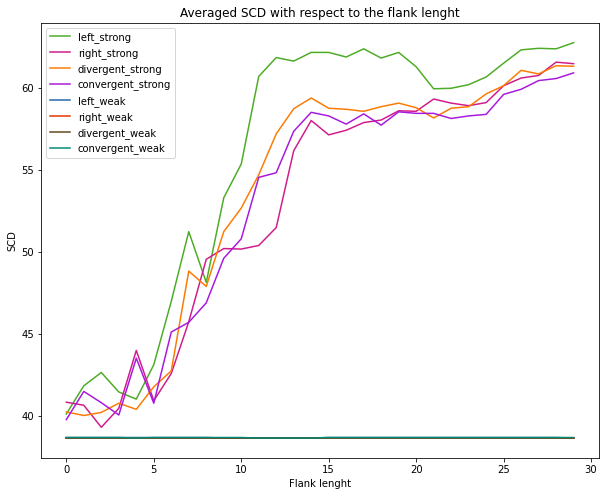

In [18]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]

plt.plot(x, df[(df["orientation"] == "<<") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="left_strong", c=strong_4colors[0])
plt.plot(x, df[(df["orientation"] == ">>") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="right_strong", c=strong_4colors[1])
plt.plot(x, df[(df["orientation"] == "<>") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="divergent_strong", c=strong_4colors[2])
plt.plot(x, df[(df["orientation"] == "><") & (df["strong"] == True)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="convergent_strong", c=strong_4colors[3])

plt.plot(x, df[(df["orientation"] == "<<") & (df["strong"] == False)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="left_weak", c=weak_4colors[0])
plt.plot(x, df[(df["orientation"] == ">>") & (df["strong"] == False)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="right_weak", c=weak_4colors[1])
plt.plot(x, df[(df["orientation"] == "<>") & (df["strong"] == False)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="divergent_weak", c=weak_4colors[2])
plt.plot(x, df[(df["orientation"] == "><") & (df["strong"] == False)].groupby(["flank_bp"]).agg({"SCD_average": ["mean"]})["SCD_average"]["mean"].iloc[0:30], label="convergent_weak", c=weak_4colors[3])

plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper left")